<b>The goal of this project is to first build a linear regression model
that predicts the “selling_price” for each car. Then, I will build both logistic regression model and a decision tree model to predict whether the car
brand be sold above their brand’s mode price or not. Finally, I will build a decision tree model to predict whether the car be sold at their brand’s 25th percentile,
50th percentile, 75th percentile or top percentile, using the following data:</b>

brand           year     km_driven     fuel     seller_type     transmission        owner
Honda           2017     40000         Petrol   Dealer          Automatic           Second Owner
Hyundai Creta   2016     6000          Petrol   Dealer          Manual              Third Owner
Mercedes-Benz   2015     9500          Diesel   Dealer          Manual              First Owner

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_log_error


In [2]:
df = pd.read_csv(r"/Users/dannystatland/Drive/MBA/data_science/CAR DETAILS.csv")

In [3]:
df.head()

,id,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,#_owner_children
0,1,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,3
1,2,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,0
2,3,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,4
3,4,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,5,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2


In [4]:
df.rename(columns = {'#_owner_children':'owner_children'}, inplace=True)
df.drop(["id", "owner_children"], axis = 1, inplace = True)
df.head(40)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti,2017,365000,78000,CNG,Individual,Manual,First Owner


In [5]:
df_dummies = pd.get_dummies(df)
#set this equal to a new variable since it will be a different data set
#dropping the first column just removes the redundancy of having all the columns there
df_dummies.head()

,year,selling_price,km_driven,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [6]:
X = df_dummies.copy() 

y = X.pop('selling_price')
#.pop() removes the column/list from X and saves it to the new variable

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   year                          4340 non-null   int64
 1   km_driven                     4340 non-null   int64
 2   brand_Ambassador              4340 non-null   uint8
 3   brand_Audi                    4340 non-null   uint8
 4   brand_BMW                     4340 non-null   uint8
 5   brand_Chevrolet               4340 non-null   uint8
 6   brand_Daewoo                  4340 non-null   uint8
 7   brand_Datsun                  4340 non-null   uint8
 8   brand_Fiat                    4340 non-null   uint8
 9   brand_Force                   4340 non-null   uint8
 10  brand_Ford                    4340 non-null   uint8
 11  brand_Honda                   4340 non-null   uint8
 12  brand_Hyundai                 4340 non-null   uint8
 13  brand_Isuzu                   434

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42) 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#create a model instance
lr_model = LinearRegression().fit(X_train, y_train)
#fit the model on the training data
print(lr_model.score(X_test,y_test))
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)
# get cross validated scores
scores = cross_val_score(lr_model, X, y, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
predicts = lr_model.predict(X_test)

#training score
print("Training Score:", lr_model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", lr_model.score(X_test, y_test))

0.5780266351198673
(3038, 46) (3038,)
(1302, 46) (1302,)
Cross-validated training scores: [0.71502304 0.76203691 0.69557828 0.59694941 0.52288296]
Mean cross-validated training score: 0.65849411889019
Training Score: 0.7202143026179666
Test Score: 0.5780266351198673


In [10]:
y_test.min()

20000

In [11]:
X_new = pd.DataFrame(columns=df.columns)
X_new.drop(columns='selling_price', inplace=True)
X_new.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner


In [12]:
df2 = pd.DataFrame([["Honda",2017,40000,"Petrol","Dealer","Automatic","Second Owner"],["Hyundai Creta",2016,6000,"Petrol","Dealer","Manual","Third Owner"],["Mercedes-Benz",2015,9500,"Diesel","Dealer","Manual","First Owner"]], columns=X_new.columns)
pd.concat([df2, X_new])

,brand,year,km_driven,fuel,seller_type,transmission,owner
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner


In [13]:
predicts = lr_model.predict(X_test)
prediction = pd.DataFrame(predicts)
r2_score(y_test, prediction)

0.5780266351198673

In [14]:
X_train

,year,km_driven,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
929,2012,49824,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3607,2016,95000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2117,2011,72000,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2792,2017,17563,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
246,2018,25000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,2006,50000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
466,2011,80000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3092,2016,51000,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3772,2013,80000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [15]:
newpredict = pd.get_dummies(df2)

In [16]:
newpredict = newpredict.reindex(labels=X.columns, axis=1, fill_value=0)
predict = lr_model.predict(newpredict)

df2["predicted_price"]= predict
df2["predicted_price"] = df2["predicted_price"].astype('int64')

In [17]:
df2.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,predicted_price
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner,836532
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner,1005482
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner,2970463


In [18]:
df["km_driven"].head(30)

0      70000
1      50000
2     100000
3      46000
4     141000
5     125000
6      25000
7      60000
8      25000
9      78000
10     35000
11    100000
12     25000
13     70000
14     50000
15    100000
16     46000
17    141000
18    125000
19     25000
20     60000
21     25000
22     78000
23     35000
24    100000
25     25000
26     24000
27      5000
28     33000
29     28000
Name: km_driven, dtype: int64

In [19]:
newpredict.head()

,year,km_driven,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2017,40000,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,2016,6000,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2015,9500,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


In [20]:
print('Regression trained: R^2={0:3.3f}'.format(lr_model.score(X_train,y_train))) 
print('Regression tested: R^2={0:3.3f}'.format(lr_model.score(X_test,y_test)))



Regression trained: R^2=0.720
Regression tested: R^2=0.578


In [21]:
print(np.sqrt(mean_squared_error(y_test, predicts)))
from sklearn.linear_model import LinearRegression


353215.2416082196


In [22]:
mse=mean_squared_error(y_test, predicts)
mae=mean_absolute_error(predicts, y_test)
mape=mean_absolute_percentage_error(y_test, predicts)
#msle=mean_squared_log_error(X_test_withY['selling_price'], prediction)
print(f'Mean squared error: {mse:3.3f}')
print(f'Root Mean squared error: {mse**0.5:3.3f}')
print(f'Mean absolute error: {mae:3.3f}')
print(f'Mean absolute percentage error: {mape:3.3f}')
#print(f'Mean squared log error: {msle:3.3f}')


Mean squared error: 124761006904.353
Root Mean squared error: 353215.242
Mean absolute error: 182682.986
Mean absolute percentage error: 0.553


In [23]:
y_test.describe()

count    1.302000e+03
mean     4.904191e+05
std      5.439560e+05
min      2.000000e+04
25%      1.990000e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64

In [24]:
y_test.mean()

490419.0967741936

In [25]:
MODES = df.groupby(['brand'])['selling_price'].apply(pd.Series.mode)

In [26]:
MODE = MODES.reset_index(level=['brand']).drop_duplicates(subset='brand', keep="first")

In [27]:
MODE

,brand,selling_price
0,Ambassador,120000
0,Audi,1580000
0,BMW,4950000
0,Chevrolet,130000
0,Daewoo,60000
0,Datsun,250000
0,Fiat,350000
0,Force,346000
0,Ford,650000
0,Honda,300000


In [28]:
len(MODE)

29

In [29]:
df["brand_mode_price"] = ""

In [30]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_mode_price
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,


In [31]:
for i in range(len(df)):
    for j in range(len(MODE)):
        if df["brand"].iloc[i] == MODE["brand"].iloc[j]:
            df["brand_mode_price"].iloc[i] = MODE["selling_price"].iloc[j]

/Users/dannystatland/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             4340 non-null   object
 1   year              4340 non-null   int64 
 2   selling_price     4340 non-null   int64 
 3   km_driven         4340 non-null   int64 
 4   fuel              4340 non-null   object
 5   seller_type       4340 non-null   object
 6   transmission      4340 non-null   object
 7   owner             4340 non-null   object
 8   brand_mode_price  4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [33]:
df["price_above_mode"] = df["selling_price"] > df["brand_mode_price"]

In [34]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_mode_price,price_above_mode
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,250000,False
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,250000,False
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,550000,True
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,250000,False
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,300000,True


In [35]:
df.drop(["brand_mode_price"], axis=1, inplace=True)

In [36]:
df_dummies = pd.get_dummies(df)
#set this equal to a new variable since it will be a different data set
#dropping the first column just removes the redundancy of having all the columns there
df_dummies.head()

,year,selling_price,km_driven,price_above_mode,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,False,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,False,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,True,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,False,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,True,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [37]:
X = df_dummies.copy() 
X.drop(["selling_price"], axis = 1, inplace = True)

y = X.pop('price_above_mode')
#.pop() removes the column/list from X and saves it to the new variable

In [38]:
X.head()

,year,km_driven,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2007,50000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2012,100000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2017,46000,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2014,141000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42) 

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X,y)
print("Training Score:", lr.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", lr.score(X_test, y_test))

Training Score: 0.5921658986175116
Test Score: 0.609062980030722


In [41]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [42]:
clf.score(X_test, y_test)

0.8379416282642089

In [43]:
clf.score(X_train, y_train)

0.9802501645819618

In [44]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import fbeta_score

predictions= clf.predict(X_test)
cm=confusion_matrix(y_test,predictions)
pre=precision_score(y_test,predictions)
rec=recall_score(y_test,predictions)
f1=f1_score(y_test,predictions)
fbeta = fbeta_score(y_test, predictions, beta=0.5)

auc=roc_auc_score(y_test,predictions)

In [45]:
print(f'tree Precision score: {pre:3.3f}')
print(f'tree Recall score: {rec:3.3f}')
#print(f'tree F1 score: {f1:3.3f}')
print(f'tree Fbeta_0.5 score: {fbeta:3.3f}')

print(f'tree AUC score: {auc:3.3f}')
print ('tree Confusion matrix:')
print(cm)

tree Precision score: 0.819
tree Recall score: 0.836
tree Fbeta_0.5 score: 0.822
tree AUC score: 0.838
tree Confusion matrix:
[[585 112]
 [ 99 506]]


In [46]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import fbeta_score

predictions= lr.predict(X_test)
cm=confusion_matrix(y_test,predictions)
pre=precision_score(y_test,predictions)
rec=recall_score(y_test,predictions)
f1=f1_score(y_test,predictions)
fbeta = fbeta_score(y_test, predictions, average='micro', beta=0.5)
auc=roc_auc_score(y_test,predictions)

In [47]:
print(f'lr Precision score: {pre:3.3f}')
print(f'lr Recall score: {rec:3.3f}')
#print(f'lr F1 score: {f1:3.3f}')

print(f'lr Fbeta_0.5 score: {fbeta:3.3f}')

print(f'lr AUC score: {auc:3.3f}')
print ('lr Confusion matrix:')
print(cm)

lr Precision score: 0.577
lr Recall score: 0.592
lr Fbeta_0.5 score: 0.609
lr AUC score: 0.608
lr Confusion matrix:
[[435 262]
 [247 358]]


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
model=LogisticRegression()
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.11)


In [49]:
from sklearn.model_selection import cross_val_score
clf1 = tree.DecisionTreeClassifier()
scores = cross_val_score(clf1, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.02)


In [50]:
df3 = pd.DataFrame([["Honda",2017,40000,"Petrol","Dealer","Automatic","Second Owner"],["Hyundai Creta",2016,6000,"Petrol","Dealer","Manual","Third Owner"],["Mercedes-Benz",2015,9500,"Diesel","Dealer","Manual","First Owner"]], columns=X_new.columns)
pd.concat([df3, X_new])

,brand,year,km_driven,fuel,seller_type,transmission,owner
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner


In [51]:
newpredict = pd.get_dummies(df3)

In [52]:
newpredict = newpredict.reindex(labels=X.columns, axis=1, fill_value=0)
predict = lr.predict(newpredict)
df3["is_selling_price_above_brand_mode_lr"] = predict

In [53]:
df3

,brand,year,km_driven,fuel,seller_type,transmission,owner,is_selling_price_above_brand_mode_lr
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner,True
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner,True
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner,True


In [54]:
df4 = pd.DataFrame([["Honda",2017,40000,"Petrol","Dealer","Automatic","Second Owner"],["Hyundai Creta",2016,6000,"Petrol","Dealer","Manual","Third Owner"],["Mercedes-Benz",2015,9500,"Diesel","Dealer","Manual","First Owner"]], columns=X_new.columns)
pd.concat([df4, X_new])

,brand,year,km_driven,fuel,seller_type,transmission,owner
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner


In [55]:
newpredict = pd.get_dummies(df4)

In [56]:
newpredict = newpredict.reindex(labels=X.columns, axis=1, fill_value=0)

In [57]:
predict = clf.predict(newpredict)
df4["is_selling_price_above_brand_mode_tree"] = predict
df4

,brand,year,km_driven,fuel,seller_type,transmission,owner,is_selling_price_above_brand_mode_tree
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner,True
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner,True
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner,True


question 3

In [58]:
QUANTILES = df.groupby(['brand'])['selling_price'].quantile([.25,.5,.75])

In [59]:
QUANTILES

brand           
Ambassador  0.25     102500.0
            0.50     120000.0
            0.75     197500.0
Audi        0.25    1300000.0
            0.50    1580000.0
                      ...    
Volkswagen  0.50     400000.0
            0.75     595000.0
Volvo       0.25    1918750.0
            0.50    1987500.0
            0.75    2625000.0
Name: selling_price, Length: 87, dtype: float64

In [60]:
quantile = pd.DataFrame(QUANTILES).reset_index() 


In [61]:
quantile.head(50)

,brand,level_1,selling_price
0,Ambassador,0.25,102500.00
1,Ambassador,0.50,120000.00
2,Ambassador,0.75,197500.00
3,Audi,0.25,1300000.00
4,Audi,0.50,1580000.00
5,Audi,0.75,1850000.00
6,BMW,0.25,1520000.00
7,BMW,0.50,2600000.00
8,BMW,0.75,4950000.00
9,Chevrolet,0.25,150000.00


In [62]:
def getQuantile(row, brandict):
    if row.selling_price < brandict[row.brand].iloc[0]:
        return 'Q1'
    elif row.selling_price < brandict[row.brand].iloc[1]:
        return 'Q2'
    elif row.selling_price < brandict[row.brand].iloc[2]:
        return 'Q3'
    else:
        return 'Q4'

In [63]:
brandict={}
for i,idf in df.groupby('brand'):
    brandict[i]=idf.selling_price.quantile([.25,.5,.75])
df['quant_selling_price'] = df.apply(getQuantile, args=([brandict]), axis=1)
print(df['quant_selling_price'].head())

0    Q1
1    Q1
2    Q4
3    Q2
4    Q2
Name: quant_selling_price, dtype: object


In [64]:
df.head(50)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,price_above_mode,quant_selling_price
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,False,Q1
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,False,Q1
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,True,Q4
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,False,Q2
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,True,Q2
5,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner,False,Q1
6,Hyundai,2016,550000,25000,Petrol,Individual,Manual,First Owner,False,Q4
7,Tata,2014,240000,60000,Petrol,Individual,Manual,Second Owner,True,Q3
8,Hyundai,2015,850000,25000,Petrol,Individual,Manual,First Owner,True,Q4
9,Maruti,2017,365000,78000,CNG,Individual,Manual,First Owner,True,Q3


In [65]:
df.drop(["price_above_mode"], axis = 1, inplace = True)

In [66]:
q3_dummies = pd.get_dummies(df, columns=["brand", "fuel","seller_type","transmission","owner"])


In [67]:
q3_dummies.head()

,year,selling_price,km_driven,quant_selling_price,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,Q1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,Q1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,Q4,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,Q2,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,Q2,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [68]:
X = q3_dummies.copy()
X.drop(["selling_price"], axis = 1, inplace = True)
y = X.pop("quant_selling_price")


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [70]:
from sklearn import tree
clf_limitless = tree.DecisionTreeClassifier()
clf_limitless = clf_limitless.fit(X_train, y_train)
y_hat = clf_limitless.predict(X_test)

In [71]:
clf_limitless.feature_importances_


array([3.16776213e-01, 2.83474065e-01, 1.10480040e-03, 4.59205813e-03,
       3.88910918e-03, 1.67149767e-02, 0.00000000e+00, 1.28917517e-03,
       5.97111881e-03, 5.51994818e-04, 1.45323057e-02, 1.04373090e-02,
       2.33988746e-02, 0.00000000e+00, 1.27692034e-03, 6.25218620e-04,
       0.00000000e+00, 0.00000000e+00, 8.44289217e-04, 1.53094797e-02,
       3.05008704e-02, 2.70758251e-03, 1.69260125e-03, 9.43928228e-03,
       0.00000000e+00, 1.30315541e-02, 9.99059108e-03, 1.81399429e-02,
       1.13095438e-02, 1.01506614e-02, 7.88564025e-04, 2.83883049e-04,
       4.01058167e-02, 0.00000000e+00, 1.85875806e-03, 2.96976730e-03,
       1.86641099e-02, 2.31376054e-02, 8.32984840e-03, 1.49374381e-02,
       5.42399196e-03, 2.71186468e-02, 5.53125610e-03, 3.02779166e-02,
       0.00000000e+00, 1.28218603e-02])

In [72]:
clf_limitless.score(X_train, y_train)

0.9535878867676103

In [73]:
clf_limitless.score(X_test, y_test)

0.6351766513056836

In [74]:
from sklearn.model_selection import cross_val_score
fbeta = fbeta_score(y_test, y_hat, average='micro', beta=0.5)
fbeta

0.6351766513056837

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_hat,y_test))

              precision    recall  f1-score   support

          Q1       0.73      0.71      0.72       341
          Q2       0.47      0.54      0.50       296
          Q3       0.60      0.55      0.58       328
          Q4       0.73      0.73      0.73       337

    accuracy                           0.64      1302
   macro avg       0.63      0.63      0.63      1302
weighted avg       0.64      0.64      0.64      1302



<AxesSubplot:>

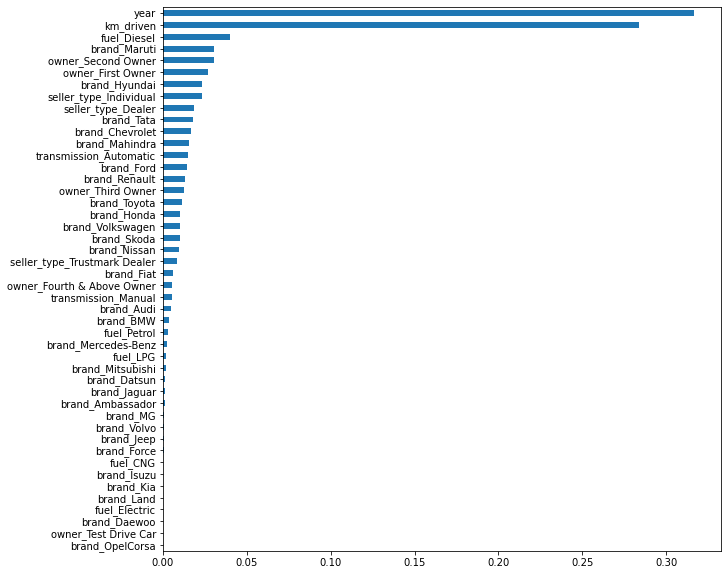

In [76]:
## plot graph of feature importances for better visualization
plt.figure(figsize=(10,10))

feat_importance = pd.Series(clf_limitless.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=True).plot(kind='barh')


In [77]:
feat_importance.sort_values(ascending=False)

year                            0.316776
km_driven                       0.283474
fuel_Diesel                     0.040106
brand_Maruti                    0.030501
owner_Second Owner              0.030278
owner_First Owner               0.027119
brand_Hyundai                   0.023399
seller_type_Individual          0.023138
seller_type_Dealer              0.018664
brand_Tata                      0.018140
brand_Chevrolet                 0.016715
brand_Mahindra                  0.015309
transmission_Automatic          0.014937
brand_Ford                      0.014532
brand_Renault                   0.013032
owner_Third Owner               0.012822
brand_Toyota                    0.011310
brand_Honda                     0.010437
brand_Volkswagen                0.010151
brand_Skoda                     0.009991
brand_Nissan                    0.009439
seller_type_Trustmark Dealer    0.008330
brand_Fiat                      0.005971
owner_Fourth & Above Owner      0.005531
transmission_Man

In [78]:
importance = clf_limitless.feature_importances_

In [79]:
features = X.columns

indices = np.argsort(importance)


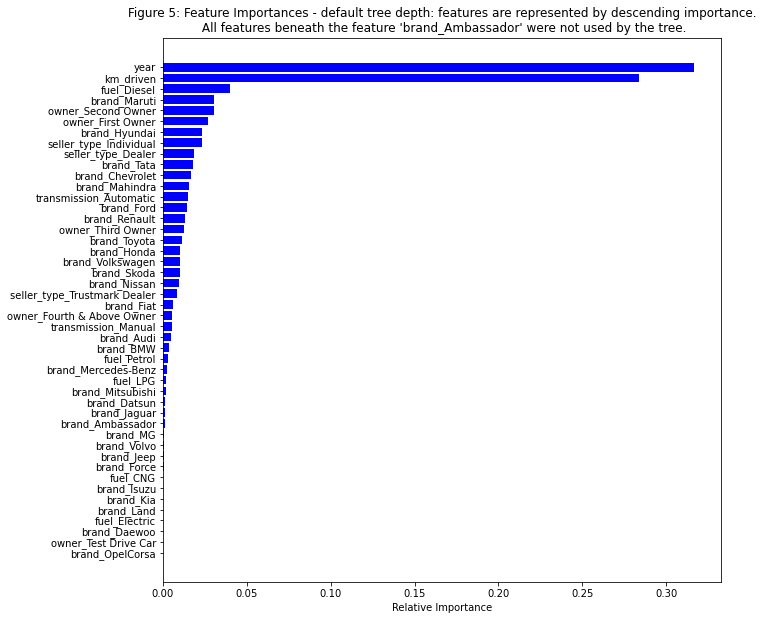

In [80]:
plt.figure(figsize=(10,10))

plt.title("Figure 5: Feature Importances - default tree depth: features are represented by descending importance.\n All features beneath the feature 'brand_Ambassador' were not used by the tree.")
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.626316 to fit



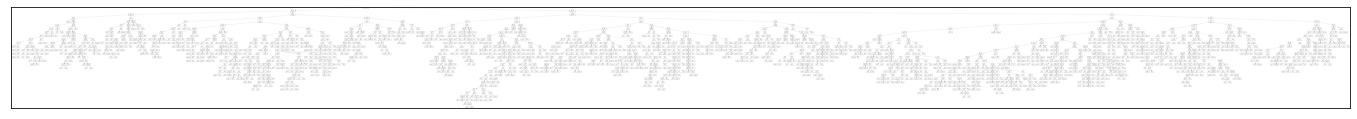

In [81]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus # generates graphs. >>pip install pydotplus + install GraphViz + conda install graphviz
# install graphviz  from: https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi 
# Add c:\Program Files (x86)\Graphviz2.38\bin\ to system path

dot_data = tree.export_graphviz(clf_limitless, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png('car_prices_depthdef.png');
fig, ax = plt.subplots(figsize=(24, 24))
ax.imshow(plt.imread('car_prices_depthdef.png'));
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#plt.show()

In [82]:
#compute accuracy
y_predict =clf_limitless.predict(X_test) 
fraction_of_correct_preditions = sum(y_test==y_predict)/len(y_test)
print('fraction of correct predictions: {0:6.6f}'.format(fraction_of_correct_preditions))

fraction of correct predictions: 0.635177


In [83]:
### Explore missclassification using confusion matrix

In [84]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix

array([[243,  60,  17,  12],
       [ 73, 159,  70,  33],
       [ 19,  52, 180,  47],
       [  6,  25,  61, 245]])

In [85]:
from IPython.display import HTML
import tabulate
table = [ ['','predicted Q1','predicted Q2','predicted Q3','predicted Q4']]
table += [ ['true Q1',conf_matrix[0,0],conf_matrix[0,1],conf_matrix[0,2],conf_matrix[0,3]]]
table += [ ['true Q2',conf_matrix[1,0],conf_matrix[1,1],conf_matrix[1,2],conf_matrix[1,3]]]
table += [ ['true q3',conf_matrix[2,0],conf_matrix[2,1],conf_matrix[2,2],conf_matrix[2,3]]]
table += [ ['true Q4',conf_matrix[3,0],conf_matrix[3,1],conf_matrix[3,2],conf_matrix[3,3]]]
HTML(tabulate.tabulate(table, tablefmt='html'))

,predicted Q1,predicted Q2,predicted Q3,predicted Q4
true Q1,243,60,17,12
true Q2,73,159,70,33
true q3,19,52,180,47
true Q4,6,25,61,245


In [86]:
X_new = pd.DataFrame(columns=df.columns)
X_new.drop(columns=['selling_price','quant_selling_price'], inplace=True)
df_limitless = pd.DataFrame([["Honda",2017,40000,"Petrol","Dealer","Automatic","Second Owner"],["Hyundai Creta",2016,6000,"Petrol","Dealer","Manual","Third Owner"],["Mercedes-Benz",2015,9500,"Diesel","Dealer","Manual","First Owner"]], columns=X_new.columns)
pd.concat([df_limitless, X_new])
newpredict_limitless = pd.get_dummies(df_limitless)
newpredict_limitless = newpredict_limitless.reindex(labels=X.columns, axis=1, fill_value=0)
predict = clf_limitless.predict(newpredict_limitless)
df_limitless["predicted_quantile"]= predict

In [87]:
df_limitless

,brand,year,km_driven,fuel,seller_type,transmission,owner,predicted_quantile
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner,Q4
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner,Q4
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner,Q4


## Tree depth: 9

clf_depth6_train_score: 0.6171823568136933
clf_depth6_test_score: 0.5821812596006144
Accuracy depth6: 0.57 (+/- 0.05)
              precision    recall  f1-score   support

          Q1       0.68      0.76      0.71       298
          Q2       0.45      0.55      0.50       273
          Q3       0.48      0.40      0.44       351
          Q4       0.71      0.63      0.67       380

    accuracy                           0.58      1302
   macro avg       0.58      0.59      0.58      1302
weighted avg       0.59      0.58      0.58      1302

0.5821812596006144
year                            0.672144
fuel_Diesel                     0.098285
km_driven                       0.094651
brand_Maruti                    0.033859
brand_Renault                   0.025020
seller_type_Trustmark Dealer    0.017970
brand_Ford                      0.014490
brand_Chevrolet                 0.007599
owner_First Owner               0.007519
owner_Second Owner              0.004774
brand_BMW         

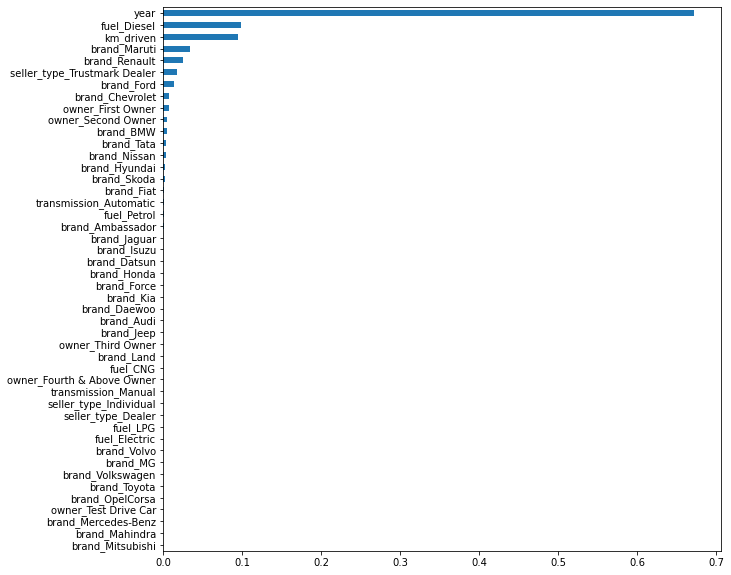

In [88]:
from sklearn import tree
from sklearn import metrics

clf_depth6 = tree.DecisionTreeClassifier(max_depth = 6)
clf_depth6 = clf_depth6.fit(X_train, y_train)
y_hat = clf_depth6.predict(X_test)
clf_depth6.feature_importances_
print('clf_depth6_train_score:', clf_depth6.score(X_train, y_train))
print('clf_depth6_test_score:', clf_depth6.score(X_test, y_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_depth6, X_train, y_train, cv=5)
print("Accuracy depth6: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
from sklearn.metrics import classification_report
print(classification_report(y_hat,y_test))
print(fbeta_score(y_test, y_hat, average='micro', beta=0.5))
## plot graph of feature importances for better visualization
plt.figure(figsize=(10,10))

feat_importance = pd.Series(clf_depth6.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=True).plot(kind='barh')
print(feat_importance.sort_values(ascending=False))
importance = clf_depth6.feature_importances_
features = X.columns
indices = np.argsort(importance)



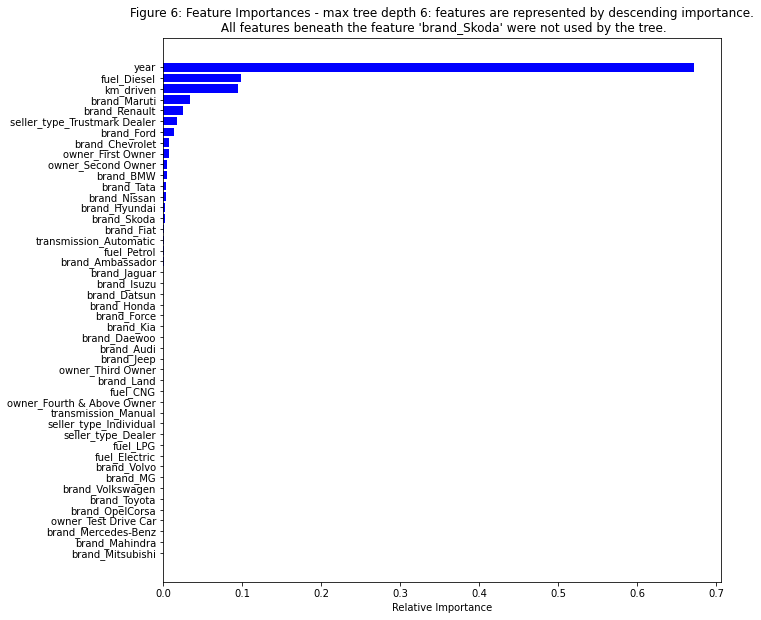

In [89]:
plt.figure(figsize=(10,10))

plt.title("Figure 6: Feature Importances - max tree depth 6: features are represented by descending importance.\n All features beneath the feature 'brand_Skoda' were not used by the tree.")
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

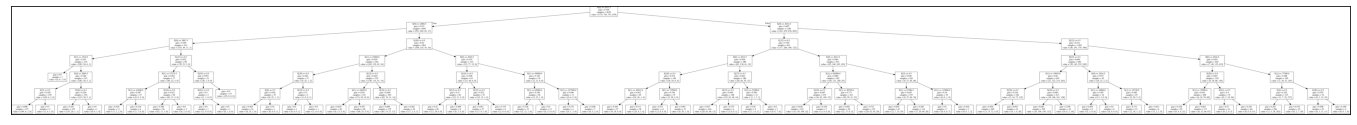

In [90]:


dot_data = tree.export_graphviz(clf_depth6, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png('car_prices_depth6.png');
fig, ax = plt.subplots(figsize=(24, 24))
ax.imshow(plt.imread('car_prices_depth6.png'));
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [91]:
#compute accuracy
y_predict =clf_depth6.predict(X_test) 
fraction_of_correct_preditions = sum(y_test==y_predict)/len(y_test)
print('fraction of correct predictions depth9: {0:6.6f}'.format(fraction_of_correct_preditions))
conf_matrix = confusion_matrix(y_test, y_predict)


table = [ ['','predicted Q1','predicted Q2','predicted Q3','predicted Q4']]
table += [ ['true Q1',conf_matrix[0,0],conf_matrix[0,1],conf_matrix[0,2],conf_matrix[0,3]]]
table += [ ['true Q2',conf_matrix[1,0],conf_matrix[1,1],conf_matrix[1,2],conf_matrix[1,3]]]
table += [ ['true q3',conf_matrix[2,0],conf_matrix[2,1],conf_matrix[2,2],conf_matrix[2,3]]]
table += [ ['true Q4',conf_matrix[3,0],conf_matrix[3,1],conf_matrix[3,2],conf_matrix[3,3]]]
HTML(tabulate.tabulate(table, tablefmt='html'))

fraction of correct predictions depth9: 0.582181


,predicted Q1,predicted Q2,predicted Q3,predicted Q4
true Q1,225,63,36,8
true Q2,58,151,90,36
true q3,12,48,142,96
true Q4,3,11,83,240


In [92]:
X_new = pd.DataFrame(columns=df.columns)
X_new.drop(columns=['selling_price','quant_selling_price'], inplace=True)
df_depth6 = pd.DataFrame([["Honda",2017,40000,"Petrol","Dealer","Automatic","Second Owner"],["Hyundai Creta",2016,6000,"Petrol","Dealer","Manual","Third Owner"],["Mercedes-Benz",2015,9500,"Diesel","Dealer","Manual","First Owner"]], columns=X_new.columns)
pd.concat([df_depth6, X_new])
newpredict_depth6 = pd.get_dummies(df_depth6)
newpredict_depth6 = newpredict_depth6.reindex(labels=X.columns, axis=1, fill_value=0)
predict = clf_depth6.predict(newpredict_depth6)
df_depth6["predicted_quantile"]= predict
df_depth6

,brand,year,km_driven,fuel,seller_type,transmission,owner,predicted_quantile
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner,Q3
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner,Q4
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner,Q4


## Tree depth: 3

clf_depth3_train_score: 0.5523370638578012
clf_depth3_test_score: 0.5506912442396313
Accuracy depth3: 0.53 (+/- 0.03)
              precision    recall  f1-score   support

          Q1       0.70      0.66      0.68       356
          Q2       0.32      0.55      0.41       193
          Q3       0.30      0.42      0.35       209
          Q4       0.85      0.53      0.65       544

    accuracy                           0.55      1302
   macro avg       0.54      0.54      0.52      1302
weighted avg       0.64      0.55      0.57      1302

year                            0.864715
fuel_Diesel                     0.119467
brand_Maruti                    0.015818
fuel_LPG                        0.000000
brand_Skoda                     0.000000
brand_Tata                      0.000000
brand_Toyota                    0.000000
brand_Volkswagen                0.000000
brand_Volvo                     0.000000
fuel_CNG                        0.000000
fuel_Electric                   0.000

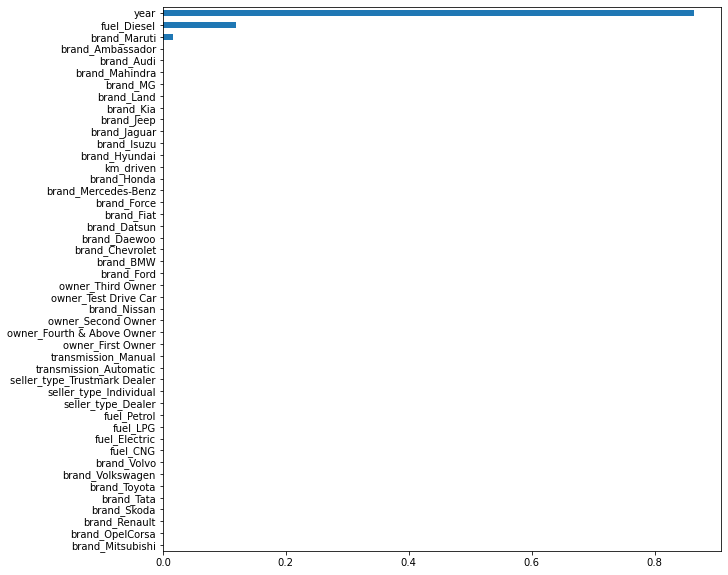

In [93]:
from sklearn import tree
clf_depth3 = tree.DecisionTreeClassifier(max_depth = 3)
clf_depth3 = clf_depth3.fit(X_train, y_train)
y_hat = clf_depth3.predict(X_test)
clf_depth3.feature_importances_
print('clf_depth3_train_score:', clf_depth3.score(X_train, y_train))
print('clf_depth3_test_score:', clf_depth3.score(X_test, y_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_depth3, X_train, y_train, cv=5)
print("Accuracy depth3: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
from sklearn.metrics import classification_report
print(classification_report(y_hat,y_test))
## plot graph of feature importances for better visualization
plt.figure(figsize=(10,10))

feat_importance = pd.Series(clf_depth3.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=True).plot(kind='barh')
print(feat_importance.sort_values(ascending=False))
importance = clf_depth3.feature_importances_
features = X.columns
indices = np.argsort(importance)


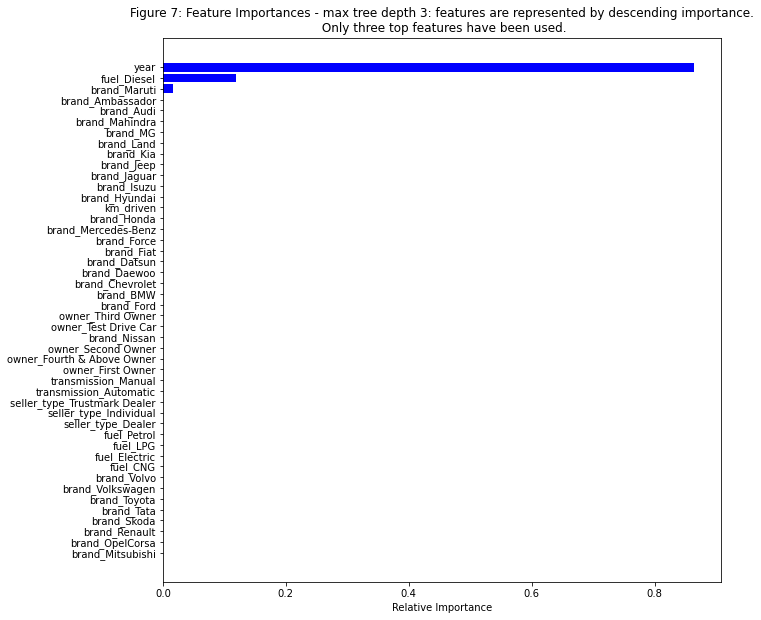

In [94]:

plt.figure(figsize=(10,10))

plt.title("Figure 7: Feature Importances - max tree depth 3: features are represented by descending importance.\n Only three top features have been used.")
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

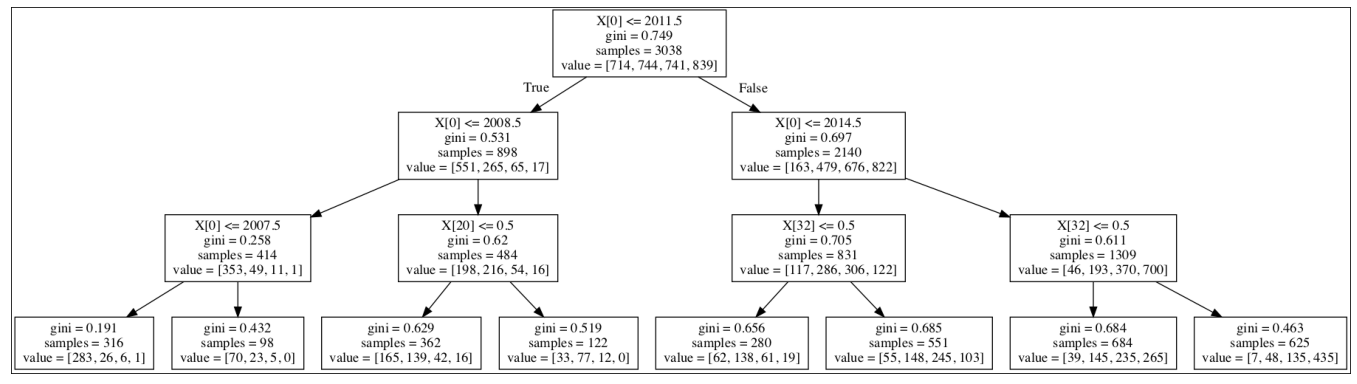

In [95]:


dot_data = tree.export_graphviz(clf_depth3, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png('car_prices_depth3.png');
fig, ax = plt.subplots(figsize=(24, 24))
ax.imshow(plt.imread('car_prices_depth3.png'));
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [96]:
#compute accuracy
y_predict =clf_depth3.predict(X_test) 
fraction_of_correct_preditions = sum(y_test==y_predict)/len(y_test)
print('fraction of correct predictions depth3: {0:6.6f}'.format(fraction_of_correct_preditions))
conf_matrix = confusion_matrix(y_test, y_predict)


table = [ ['','predicted Q1','predicted Q2','predicted Q3','predicted Q4']]
table += [ ['true Q1',conf_matrix[0,0],conf_matrix[0,1],conf_matrix[0,2],conf_matrix[0,3]]]
table += [ ['true Q2',conf_matrix[1,0],conf_matrix[1,1],conf_matrix[1,2],conf_matrix[1,3]]]
table += [ ['true q3',conf_matrix[2,0],conf_matrix[2,1],conf_matrix[2,2],conf_matrix[2,3]]]
table += [ ['true Q4',conf_matrix[3,0],conf_matrix[3,1],conf_matrix[3,2],conf_matrix[3,3]]]
HTML(tabulate.tabulate(table, tablefmt='html'))

fraction of correct predictions depth3: 0.550691


,predicted Q1,predicted Q2,predicted Q3,predicted Q4
true Q1,234,46,27,25
true Q2,89,107,59,80
true q3,26,33,88,151
true Q4,7,7,35,288


In [97]:
X_new = pd.DataFrame(columns=df.columns)
X_new.drop(columns=['selling_price','quant_selling_price'], inplace=True)
df_depth3 = pd.DataFrame([["Honda",2017,40000,"Petrol","Dealer","Automatic","Second Owner"],["Hyundai Creta",2016,6000,"Petrol","Dealer","Manual","Third Owner"],["Mercedes-Benz",2015,9500,"Diesel","Dealer","Manual","First Owner"]], columns=X_new.columns)
pd.concat([df_depth3, X_new])
newpredict_depth3 = pd.get_dummies(df_depth3)
newpredict_depth3 = newpredict_depth3.reindex(labels=X.columns, axis=1, fill_value=0)
predict = clf_depth3.predict(newpredict_depth3)
df_depth3["predicted_quantile"]= predict
df_depth3

,brand,year,km_driven,fuel,seller_type,transmission,owner,predicted_quantile
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner,Q4
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner,Q4
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner,Q4


In [98]:
df_depth3 = df_depth3.rename(columns={"predicted_quantile": "q_depth_3"})
df_depth3["q_depth_6"] = df_depth6["predicted_quantile"]
df_depth3["q_depth_unbound"] = df_limitless["predicted_quantile"]


In [99]:
df_depth3

,brand,year,km_driven,fuel,seller_type,transmission,owner,q_depth_3,q_depth_6,q_depth_unbound
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner,Q4,Q3,Q4
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner,Q4,Q4,Q4
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner,Q4,Q4,Q4
